In [1]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

from gridworld import GridWorld,plot_value, plot_policy
import numpy as np

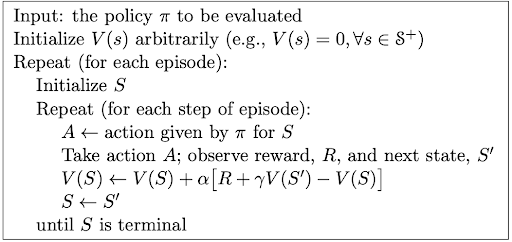

In [27]:
def TD_prediction(Pi,V,size,alpha,gamma,iter_num):
    for _ in range(iter_num):
        env = GridWorld(size)
        done = False
        while not done:
            current_state = env.agent_position.copy()
            action = np.random.choice(range(4),p = Pi[tuple(current_state)])
            next_state, reward, done, info = env.step(action)
            update = alpha * (reward + gamma*V[tuple(next_state)] - V[tuple(current_state)] )
            V[tuple(current_state)] = V[tuple(current_state)] + update
    return V

In [28]:
size = 5
Pi = dict.fromkeys([(i,j) for i in range(size) for j in range(size) if i+j != 0 and i+j != (size-1)*2], [0.25]*4)# inital actions as UP
V = dict.fromkeys([(i,j) for i in range(size) for j in range(size)], 0) # values as 0

In [31]:
V_final = TD_prediction(Pi,V,size,0.1,0.5,1000)

In [32]:
plot_value(V,size)

0	|-1.4	|-1.9	|-2.0	|-2.0	|
-1.6	|-1.9	|-2.0	|-2.0	|-2.0	|
-1.9	|-2.0	|-2.0	|-2.0	|-1.8	|
-2.0	|-2.0	|-2.0	|-1.9	|-1.4	|
-2.0	|-2.0	|-1.9	|-1.3	|0	|
